In [1]:
import numpy as np
from node import Node
from element import Element
from frame import Frame

# How to implement your own example?
1. First create a `Frame` object.
```python
F = Frame()
```
2. Then create `Node` objects and give the `np.array(x, y, z)` coordinates and determine if the node is constrained in any direction by giving it the prescribed value. 
* If it is a free node, then no need to give any value to the `u_x, u_y, u_z, theta_x, theta_y, theta_z` but you have to define the loading set `F_x, F_y, F_z, M_x, M_y, M_z`.
* If it is a supported node, then you only have to give the prescribed value to the `u_x, u_y, u_z, theta_x, theta_y, theta_z`. 
* for example for a fixed node at the origin and a pinned node at (1, 0, 0) and a free node you can define the nodes as follows:
```python
# fixed node
node1 = Node(np.array([0, 0, 0]), u_x=0, u_y=0, u_z=0, theta_x=0, theta_y=0, theta_z=0)
# pinned node
node2 = Node(np.array([1, 0, 0]), u_x=0, u_y=0, u_z=0)
# free node
node3 = Node(np.array([2, 0, 0]), F_x=0, F_y=0, F_z=0, M_x=0, M_y=0, M_z=0)
```
3. Then create `Element` objects and give the nodes and the material properties. (if you are solving a 2D frame, just set the `Iz` `Iy` and `J` to 1)
```python
# create an element
element1 = Element(node_list=[node1, node2], E=200, A=10e3, Iy = 10e6, Iz = 10e6, J=10e6, nu = 0.3)
```
4. Add the elements to the frame.
```python
F.add_element(element1)
```
5. Assemble the global stiffness matrix 
```python
F.assemble()
```
6. Solve for the unknown displacements and reactions
```python
delta, F_rxn = F.solve()
```
7. you can plot the initial and deformed shape of the frame using the `plot_deformed` method of the frame and scale the deformation - Remember you should have either a disp/rot or a force/moment for each direction on each node.:
```python
F.plot_deformed(F.dofs_array, scale = 100)
```

* Example 3.3

<div style="text-align:center">
    <img src="/Users/erfan/Documents/Courses/mastanJ/figs/ex3-3.png" width="200"/>
</div>

[np.float64(0.00038189028931850407) np.float64(0.001227795342422829)
 np.float64(-5.961942273135206e-15) np.float64(-1.8081774242036246e-15)
 np.float64(4.85660144287938e-16) np.float64(-3.5535387465535565e-05)
 np.float64(-0.0004378840577771942) np.float64(-0.0002688051858706998)
 np.float64(0.00016149961526849642) np.float64(0.0002836009809201584)]
[np.float64(-144.26163162400488) np.float64(4.397639881213321e-14)
 np.float64(1.2692786046531686e-13) np.float64(9.573578162645446e-14)
 np.float64(-162.53129239176212) np.float64(-177.12951359349688)
 np.float64(3.109239668097673e-15) np.float64(3.379562808146343e-14)
 np.float64(-3.309016850417852e-14) np.float64(-220.49092916772753)
 np.float64(-0.0026596257679258398) np.float64(3.088818287261903e-14)
 np.float64(2.00765835872671e-14) np.float64(-1.2101687748830253e-13)]


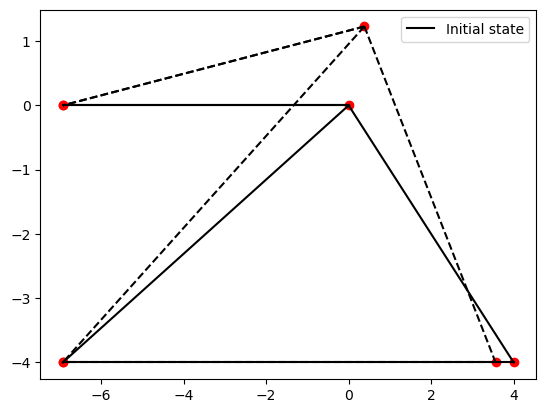

In [2]:
F = Frame()
node1 = Node(coords = np.array([0, 0, 0]), F_x = 500*np.cos(40*np.pi/180), F_y = 500*np.sin(40*np.pi/180), F_z = 0, M_x = 0, M_y = 0, M_z = 0) # node a
# node2 = Node(coords = np.array([4, -4, 0]), F_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, theta_z = 0) # node b
node2 = Node(coords = np.array([4, -4, 0]), F_x = 0, M_z = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0) # node b
node3 = Node(coords = np.array([-6.928, -4, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, M_z = 0) # node c
node4 = Node(coords = np.array([-6.928, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, M_z = 0) 
elem1 = Element(node_list=[node1, node2], A = 20e3, E = 200, Iy = 1, Iz = 1, J = 1, nu = 0.3)
elem2 = Element(node_list=[node2, node3], A = 18e3, E = 200, Iy = 1, Iz = 1, J = 1, nu = 0.3)
elem3 = Element(node_list=[node1, node3], A = 15e3, E = 200, Iy = 1, Iz = 1, J = 1, nu = 0.3)
elem4 = Element(node_list=[node1, node4], A = 20e3, E = 200, Iy = 1, Iz = 1, J = 1, nu = 0.3)
F.add_elements([elem1, elem2, elem3, elem4])
F.assemble()
delta, F_rxn = F.solve()
print(delta)
print(F_rxn)
F.plot_deformed(F.dofs_array, 1000)

* Example 3.5

<div style="text-align:center">
    <img src="/Users/erfan/Documents/Courses/mastanJ/figs/ex3-5.png" width="200"/>
</div>

[np.float64(0.0) np.float64(-0.0004082482904638617)
 np.float64(1.0789440256383953e-16) np.float64(0.009812263687291782)
 np.float64(-0.002230710143300818) np.float64(0.0) np.float64(0.0)
 np.float64(0.0) np.float64(0.0) np.float64(0.01092761875894219)
 np.float64(-0.007801844614581815) np.float64(0.0) np.float64(0.0)
 np.float64(0.0) np.float64(0.0)]
[np.float64(-282.84271247461925) np.float64(-772.7406610312539)
 np.float64(0.0) np.float64(0.0) np.float64(0.0)
 np.float64(1055.5833735058732) np.float64(0.0) np.float64(0.0)
 np.float64(0.0)]


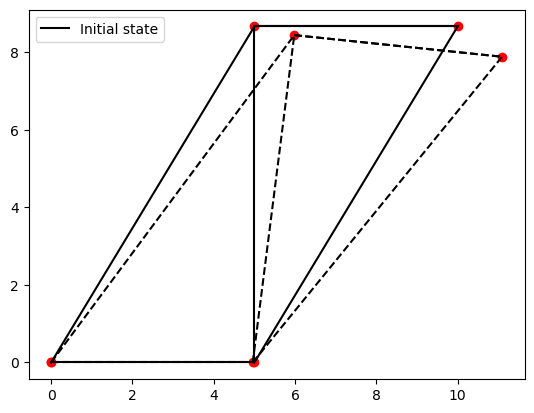

In [3]:
F2 = Frame()
node1 = Node(coords = np.array([0, 0, 0]), u_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, M_z = 0) # node a
node2 = Node(coords = np.array([5, 0, 0]), F_x = 0, u_y = 0, u_z = 0, theta_x = 0, theta_y = 0, M_z = 0) # node b
node3 = Node(coords = np.array([5, 5*np.tan(60*np.pi/180), 0]), F_z = 0, F_x = 0, F_y = 0,  M_x = 0, M_y = 0, M_z = 0) # node c
node4 = Node(coords = np.array([10, 5*np.tan(60*np.pi/180), 0]), F_z = 0, F_x = 400*np.cos(45*np.pi/180), F_y = -400*np.sin(45*np.pi/180), M_x = 0, M_y = 0, M_z = 0)
elem1 = Element(node_list=[node1, node2], A = 10e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem2 = Element(node_list=[node2, node3], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem3 = Element(node_list=[node1, node3], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem4 = Element(node_list=[node2, node4], A = 15e3, E = 200, Iy = 0, Iz = 0, J = 0)
elem5 = Element(node_list=[node3, node4], A = 10e3, E = 200, Iy = 0, Iz = 0, J = 0)
F2.add_elements([elem1, elem2, elem3, elem4, elem5])
F2.assemble()
delta, F_rxn = F2.solve()
print(delta)
print(F_rxn)
F2.plot_deformed(F2.dofs_array, 100)